<a href="https://colab.research.google.com/github/alexandrebvd/Code-Samples-for-Students/blob/master/Colab_4_Building_a_Convolutional_Neural_Network_in_TensorFlow_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Installing dependencies and notebook gpu setup

In [1]:
!pip install tensorflow-gpu==2.0.0.alpha0

     |████████████████████████████████| 332.1MB 48kB/s 
     |████████████████████████████████| 3.0MB 37.8MB/s 
     |████████████████████████████████| 419kB 44.4MB/s 


## Step 2: Importing the libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

'2.0.0-alpha0'

## Step 3: Data Preprocessing

### Loading the Cifar10 dataset

In [0]:
# Setting class names in the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
# Loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


### Image normalization

In [0]:
X_train = X_train / 255.0

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
X_test = X_test / 255.0

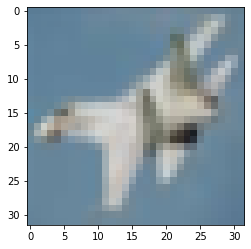

In [8]:
plt.imshow(X_test[10])

## Step 4: Building a Convolutional Neural Network

### Defining the model

In [0]:
model = tf.keras.models.Sequential()

### Adding the first convolutional layer

CNN layer hyper-parameters:
- filters: 32
- kernel_size: 3
- padding: same
- activation: relu
- input_shape: (32, 32, 3)


In [0]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))

### Adding the second convolutional layer and the max-pooling layer

CNN layer hyper-parameters:
- filters: 32
- kernel_size:3
- padding: same
- activation: relu

MaxPool layer hyper-parameters:
- pool_size: 2
- strides: 2
- padding: valid

In [0]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding the third convolutional layer

CNN layer hyper-parameters:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu


In [0]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

###  Adding the fourth convolutional layer and max-pooling layer

CNN layer hyper-parameters:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu

MaxPool layer hyper-parameters:

    pool_size: 2
    strides: 2
    padding: valid


In [0]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding the flattening layer

In [0]:
model.add(tf.keras.layers.Flatten())

### Adding the first fully-connected layer

Dense layer hyper-parameters:
- units/neurons: 128
- activation: relu

In [0]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Adding the output layer

Dense layer hyper-parameters:

 - units/neurons: 10 (number of classes)
 - activation: softmax


In [0]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

### Compiling the model

#### sparse_categorical_accuracy
sparse_categorical_accuracy checks to see if the maximal true value is equal to the index of the maximal predicted value.

https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy 

In [0]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

### Training the model

In [21]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
50000/50000 [==============================] - 25s 503us/sample - loss: 1.3464 - sparse_categorical_accuracy: 0.5128
Epoch 2/5
50000/50000 [==============================] - 21s 420us/sample - loss: 0.8878 - sparse_categorical_accuracy: 0.6865
Epoch 3/5
50000/50000 [==============================] - 21s 422us/sample - loss: 0.7167 - sparse_categorical_accuracy: 0.7492
Epoch 4/5
50000/50000 [==============================] - 21s 421us/sample - loss: 0.5922 - sparse_categorical_accuracy: 0.7919
Epoch 5/5
50000/50000 [==============================] - 21s 419us/sample - loss: 0.4904 - sparse_categorical_accuracy: 0.8287


### Evaluating the model

In [22]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 178us/sample - loss: 0.7831 - sparse_categorical_accuracy: 0.7455


In [24]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7455000281333923


# Objective: Create a model to give a better result on test set

In [0]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))
model2.add(tf.keras.layers.Dropout(0.3))
model2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model2.add(tf.keras.layers.Dropout(0.3))
model2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model2.add(tf.keras.layers.Dropout(0.3))
model2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model2.add(tf.keras.layers.Dropout(0.3))
model2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(units=128, activation='relu'))
model2.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [70]:
model2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_35 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
dropout_36 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_37 (Dropout)         (None, 16, 16, 64)      

In [0]:
model2.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

In [72]:
model2.fit(X_train, y_train, epochs=15)

Epoch 1/15
50000/50000 [==============================] - 24s 481us/sample - loss: 1.5345 - sparse_categorical_accuracy: 0.4414
Epoch 2/15
50000/50000 [==============================] - 24s 480us/sample - loss: 1.0932 - sparse_categorical_accuracy: 0.6093
Epoch 3/15
50000/50000 [==============================] - 23s 457us/sample - loss: 0.9281 - sparse_categorical_accuracy: 0.6718
Epoch 4/15
50000/50000 [==============================] - 22s 446us/sample - loss: 0.8338 - sparse_categorical_accuracy: 0.7050
Epoch 5/15
50000/50000 [==============================] - 22s 445us/sample - loss: 0.7652 - sparse_categorical_accuracy: 0.7297
Epoch 6/15
50000/50000 [==============================] - 22s 444us/sample - loss: 0.7094 - sparse_categorical_accuracy: 0.7488
Epoch 7/15
50000/50000 [==============================] - 22s 446us/sample - loss: 0.6694 - sparse_categorical_accuracy: 0.7617
Epoch 8/15
50000/50000 [==============================] - 22s 444us/sample - loss: 0.6271 - sparse_categ

In [73]:
test_loss, test_accuracy = model2.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 184us/sample - loss: 0.7359 - sparse_categorical_accuracy: 0.7525


In [74]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7524999976158142
